In [28]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import gpflow
from gpflow.utilities import print_summary

$\mathbf{k}_{*u} == K(x_*,\mathbf{x_u})$

In [103]:
oldX = np.array([[1.0]])
oldY = np.array([[2.0]])
m = gpflow.models.GPR((oldX, oldY),kernel=gpflow.kernels.RBF(1.0))
postmean,postcov = m.predict_f(X,full_cov=True)

In [107]:
postcov[0,:,:].shape

TensorShape([20, 20])

In [168]:
X.shape

(11, 1)

In [169]:
cov.shape

TensorShape([1, 15, 15])

<tf.Tensor: shape=(4, 11), dtype=float64, numpy=
array([[ 4.48921753e-01,  1.71488376e-01, -1.33127198e-02,
        -4.97900201e-03,  1.57850706e-03, -7.90664591e-05,
        -5.78206929e-05,  1.51099457e-05, -3.00630630e-07,
        -6.42554581e-07,  1.41113030e-07],
       [ 1.71488376e-01,  3.95556803e-01,  1.75631121e-01,
        -1.17633192e-02, -5.47021285e-03,  1.60311150e-03,
        -6.10734325e-05, -6.25223071e-05,  1.52022231e-05,
        -1.04084960e-07, -6.42554581e-07],
       [-1.33127198e-02,  1.75631121e-01,  3.95235200e-01,
         1.75510840e-01, -1.17251863e-02, -5.47212284e-03,
         1.60171478e-03, -6.07102532e-05, -6.25237641e-05,
         1.52022231e-05, -3.00630630e-07],
       [-4.97900201e-03, -1.17633192e-02,  1.75510840e-01,
         3.95190214e-01,  1.75525102e-01, -1.17259006e-02,
        -5.47264521e-03,  1.60185044e-03, -6.07102532e-05,
        -6.25223071e-05,  1.51099457e-05]])>

In [171]:
class Funky(gpflow.kernels.Kernel):
    def __init__(self):
        super().__init__(active_dims=[0])
        self.variance = gpflow.Parameter(1.0)

    def K(self, X, X2=None):
        if X2 is None:
            X2 = X
        oldX = np.array([[45.0]])
        oldY = np.array([[1.0]])
        m = gpflow.models.GPR((oldX, oldY),kernel=gpflow.kernels.RBF(1.0))
        _,cov = m.predict_f(np.r_[X,X2],full_cov=True)
        postcov = cov[0,X.shape[0]:,:X.shape[0]]

        return postcov #self.variance * tf.minimum(X, tf.transpose(X2))  # this returns a 2D tensor

    def K_diag(self, X):
        return tf.linalg.diag_part(k_brownian.K(X))[0,:] # self.variance * tf.reshape(X, (-1,))  # this returns a 1D tensor
        #np.diag(self.K(X,X)) #lazy #

k_funky = Funky()

In [172]:
def run_adam(model, iterations):
    """
    Utility function running the Adam optimizer

    :param model: GPflow model
    :param interations: number of iterations
    """
    # Create an Adam Optimizer action
    logf = []
    training_loss = model.training_loss_closure(data)
    optimizer = tf.optimizers.Adam()

    @tf.function
    def optimization_step():
        optimizer.minimize(training_loss, model.trainable_variables)

    for step in range(iterations):
        optimization_step()

In [173]:
N = 20
X = np.linspace(0,10,11)[:,None]
Y = np.ones_like(X)*10
data = (X,Y)

In [174]:
k = Funky()
k2 = gpflow.kernels.RBF()
#k = k1 + k2
m = gpflow.models.GPR((X, Y), kernel=k2)

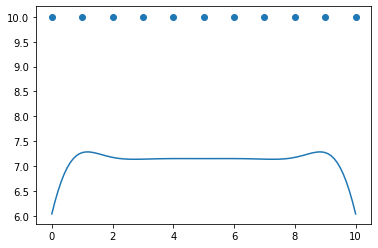

In [178]:
plt.scatter(X,Y)
Xtest = np.linspace(0,10,100)[:,None]
predmean,predvar = m.predict_f(Xtest)
plt.plot(Xtest,predmean)

In [94]:
opt = gpflow.optimizers.Scipy()
opt_logs = opt.minimize(m.training_loss, m.trainable_variables, options=dict(maxiter=100))
#print_summary(m,fmt='notebook')

ValueError: in converted code:

    /home/mike/anaconda3/lib/python3.6/site-packages/gpflow/optimizers/scipy.py:89 _tf_eval  *
        return loss, cls.pack_tensors(grads)
    /home/mike/anaconda3/lib/python3.6/site-packages/gpflow/optimizers/scipy.py:116 pack_tensors  *
        flats = [tf.reshape(tensor, (-1,)) for tensor in tensors]
    /home/mike/anaconda3/lib/python3.6/site-packages/tensorflow_core/python/ops/array_ops.py:193 reshape
        result = gen_array_ops.reshape(tensor, shape, name)
    /home/mike/anaconda3/lib/python3.6/site-packages/tensorflow_core/python/ops/gen_array_ops.py:7443 reshape
        "Reshape", tensor=tensor, shape=shape, name=name)
    /home/mike/anaconda3/lib/python3.6/site-packages/tensorflow_core/python/framework/op_def_library.py:486 _apply_op_helper
        (input_name, err))

    ValueError: Tried to convert 'tensor' to a tensor and failed. Error: None values not supported.
